In [1]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
 pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     ---------------------------------------- 14.2/14.2 MB 8.5 MB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalled

In [58]:
pip install keras-tuner --upgrade

     -------------------------------------- 135.7/135.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 1.8 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
import seaborn as sns
#from collections import Counter
#sns.set_style('darkgrid')
#from imblearn.pipeline import Pipeline
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report
#import plotly.express as px
#from plotly.offline import plot as off
#import plotly.figure_factory as ff
#import plotly.io as pio

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV


from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier


In [18]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# About Dataset

##### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
###### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



### Attribute Information:

##### The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# Data Exploration

In [19]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [20]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# Descriptive Analysis

In [21]:
df.shape

(15039, 11)

In [22]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [23]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [25]:
df[df.duplicated()].shape

(0, 11)

In [26]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


#### The features are not on the same scale. For example AP has a mean of 1013.19 and CO has a mean value of 1.97. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [28]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [29]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## Data Visualization

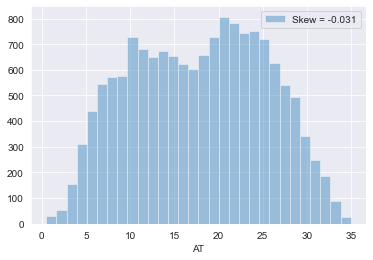

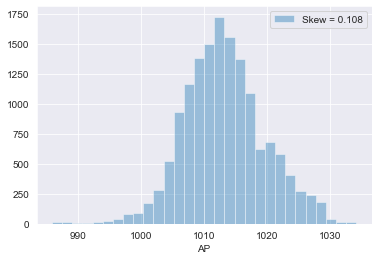

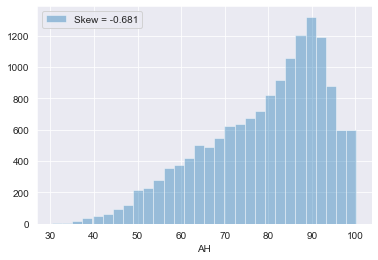

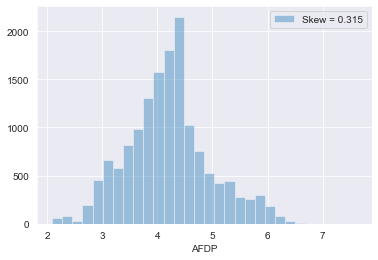

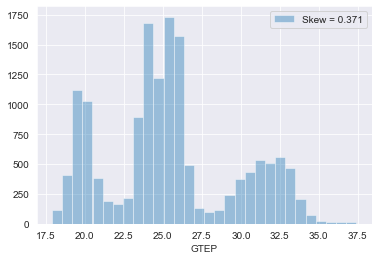

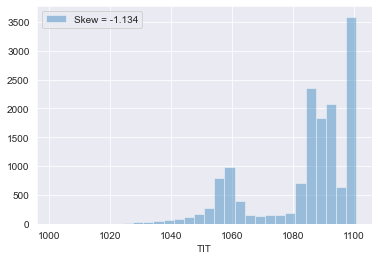

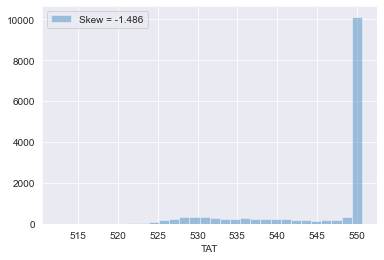

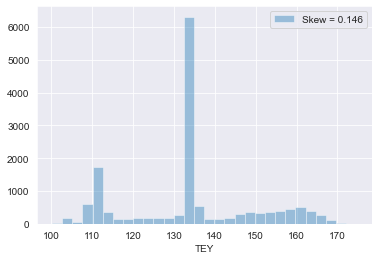

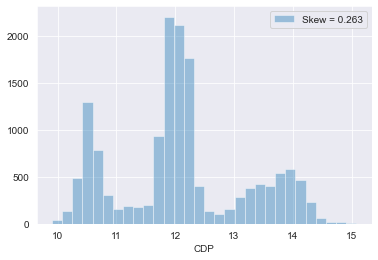

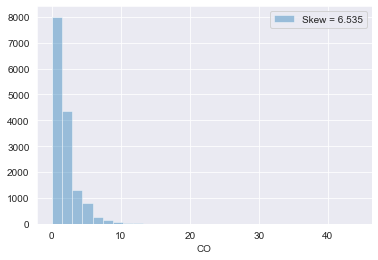

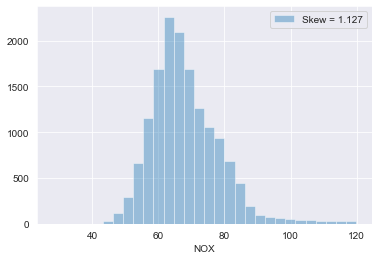

In [30]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<AxesSubplot:>

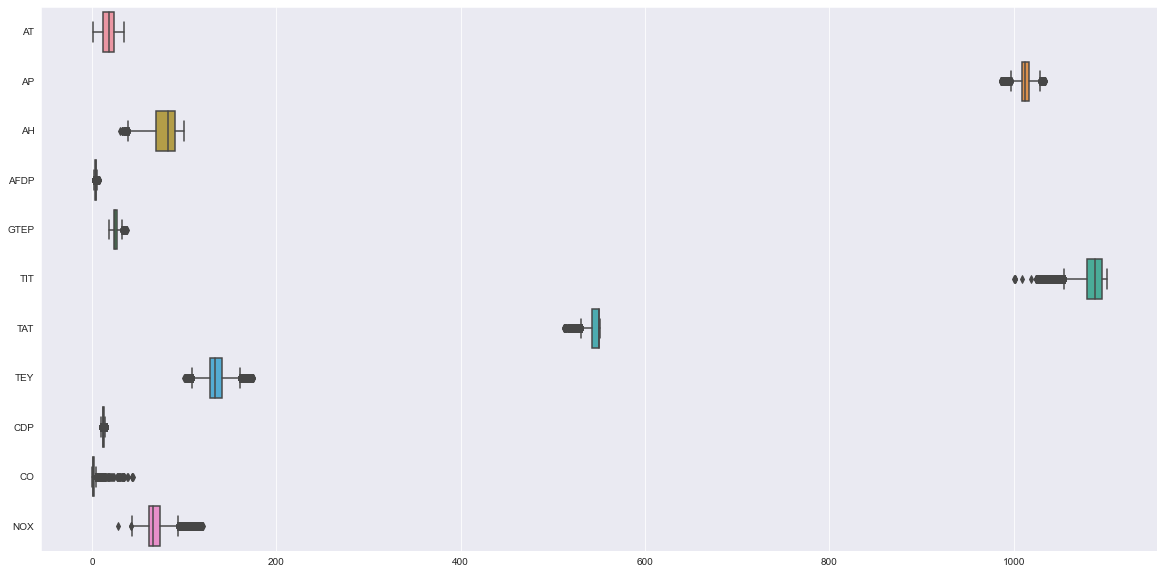

In [31]:
#outlier
plt.figure(figsize=(20,10))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

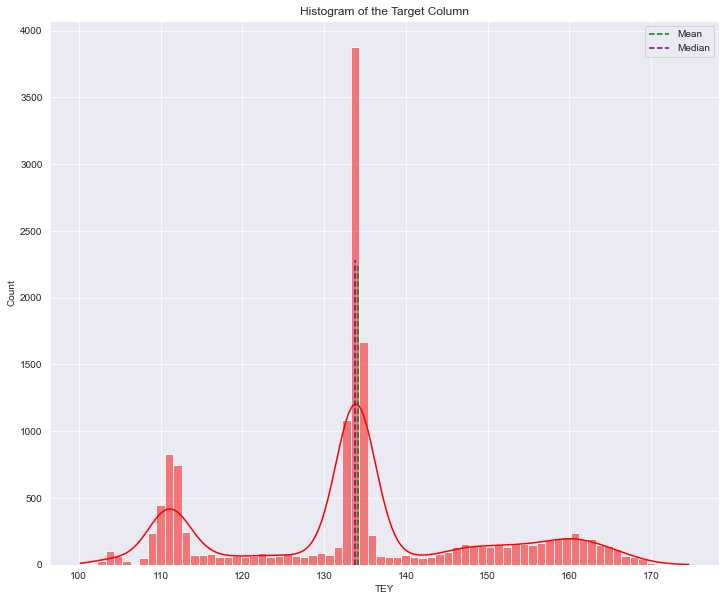

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

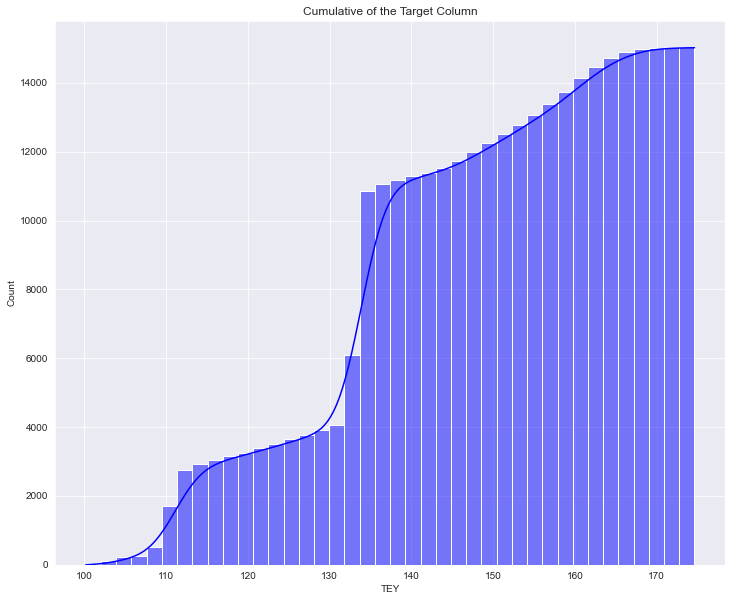

In [33]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="blue",cumulative=True)
plt.title("Cumulative of the Target Column")

####  Multivariate Analysis
* Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

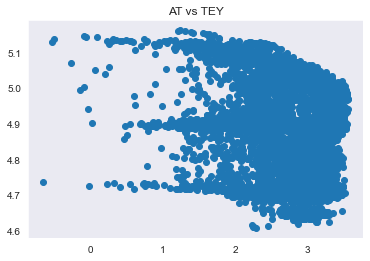

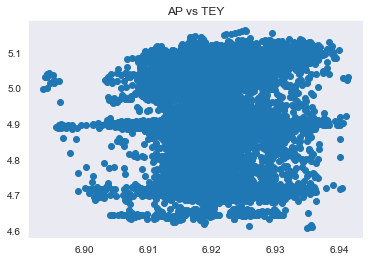

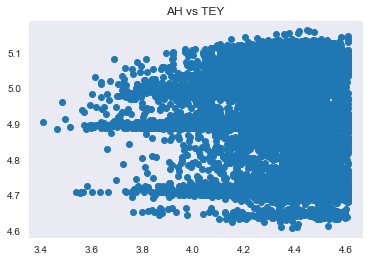

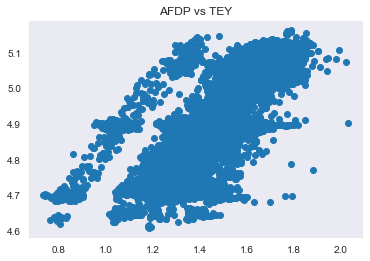

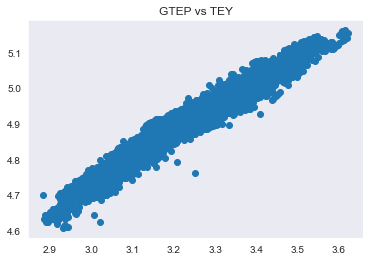

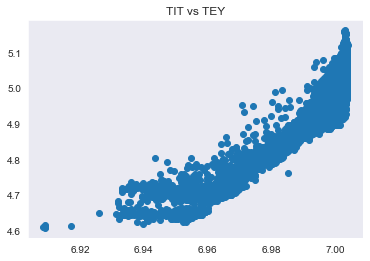

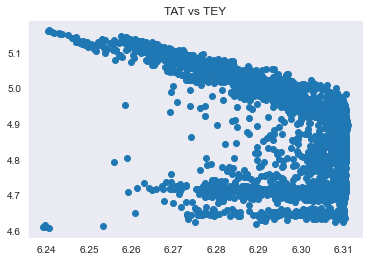

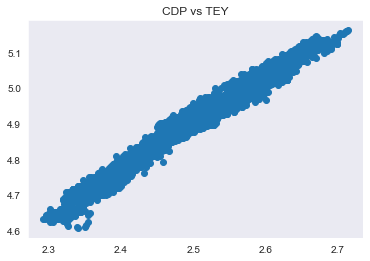

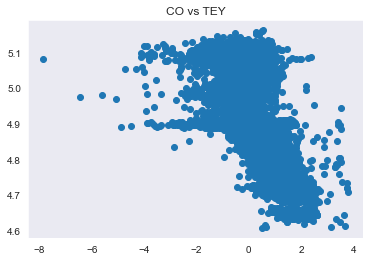

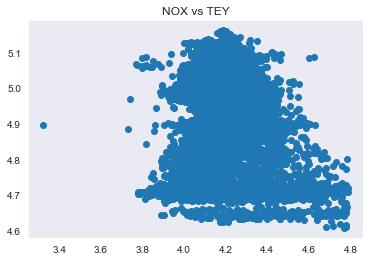

In [34]:
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

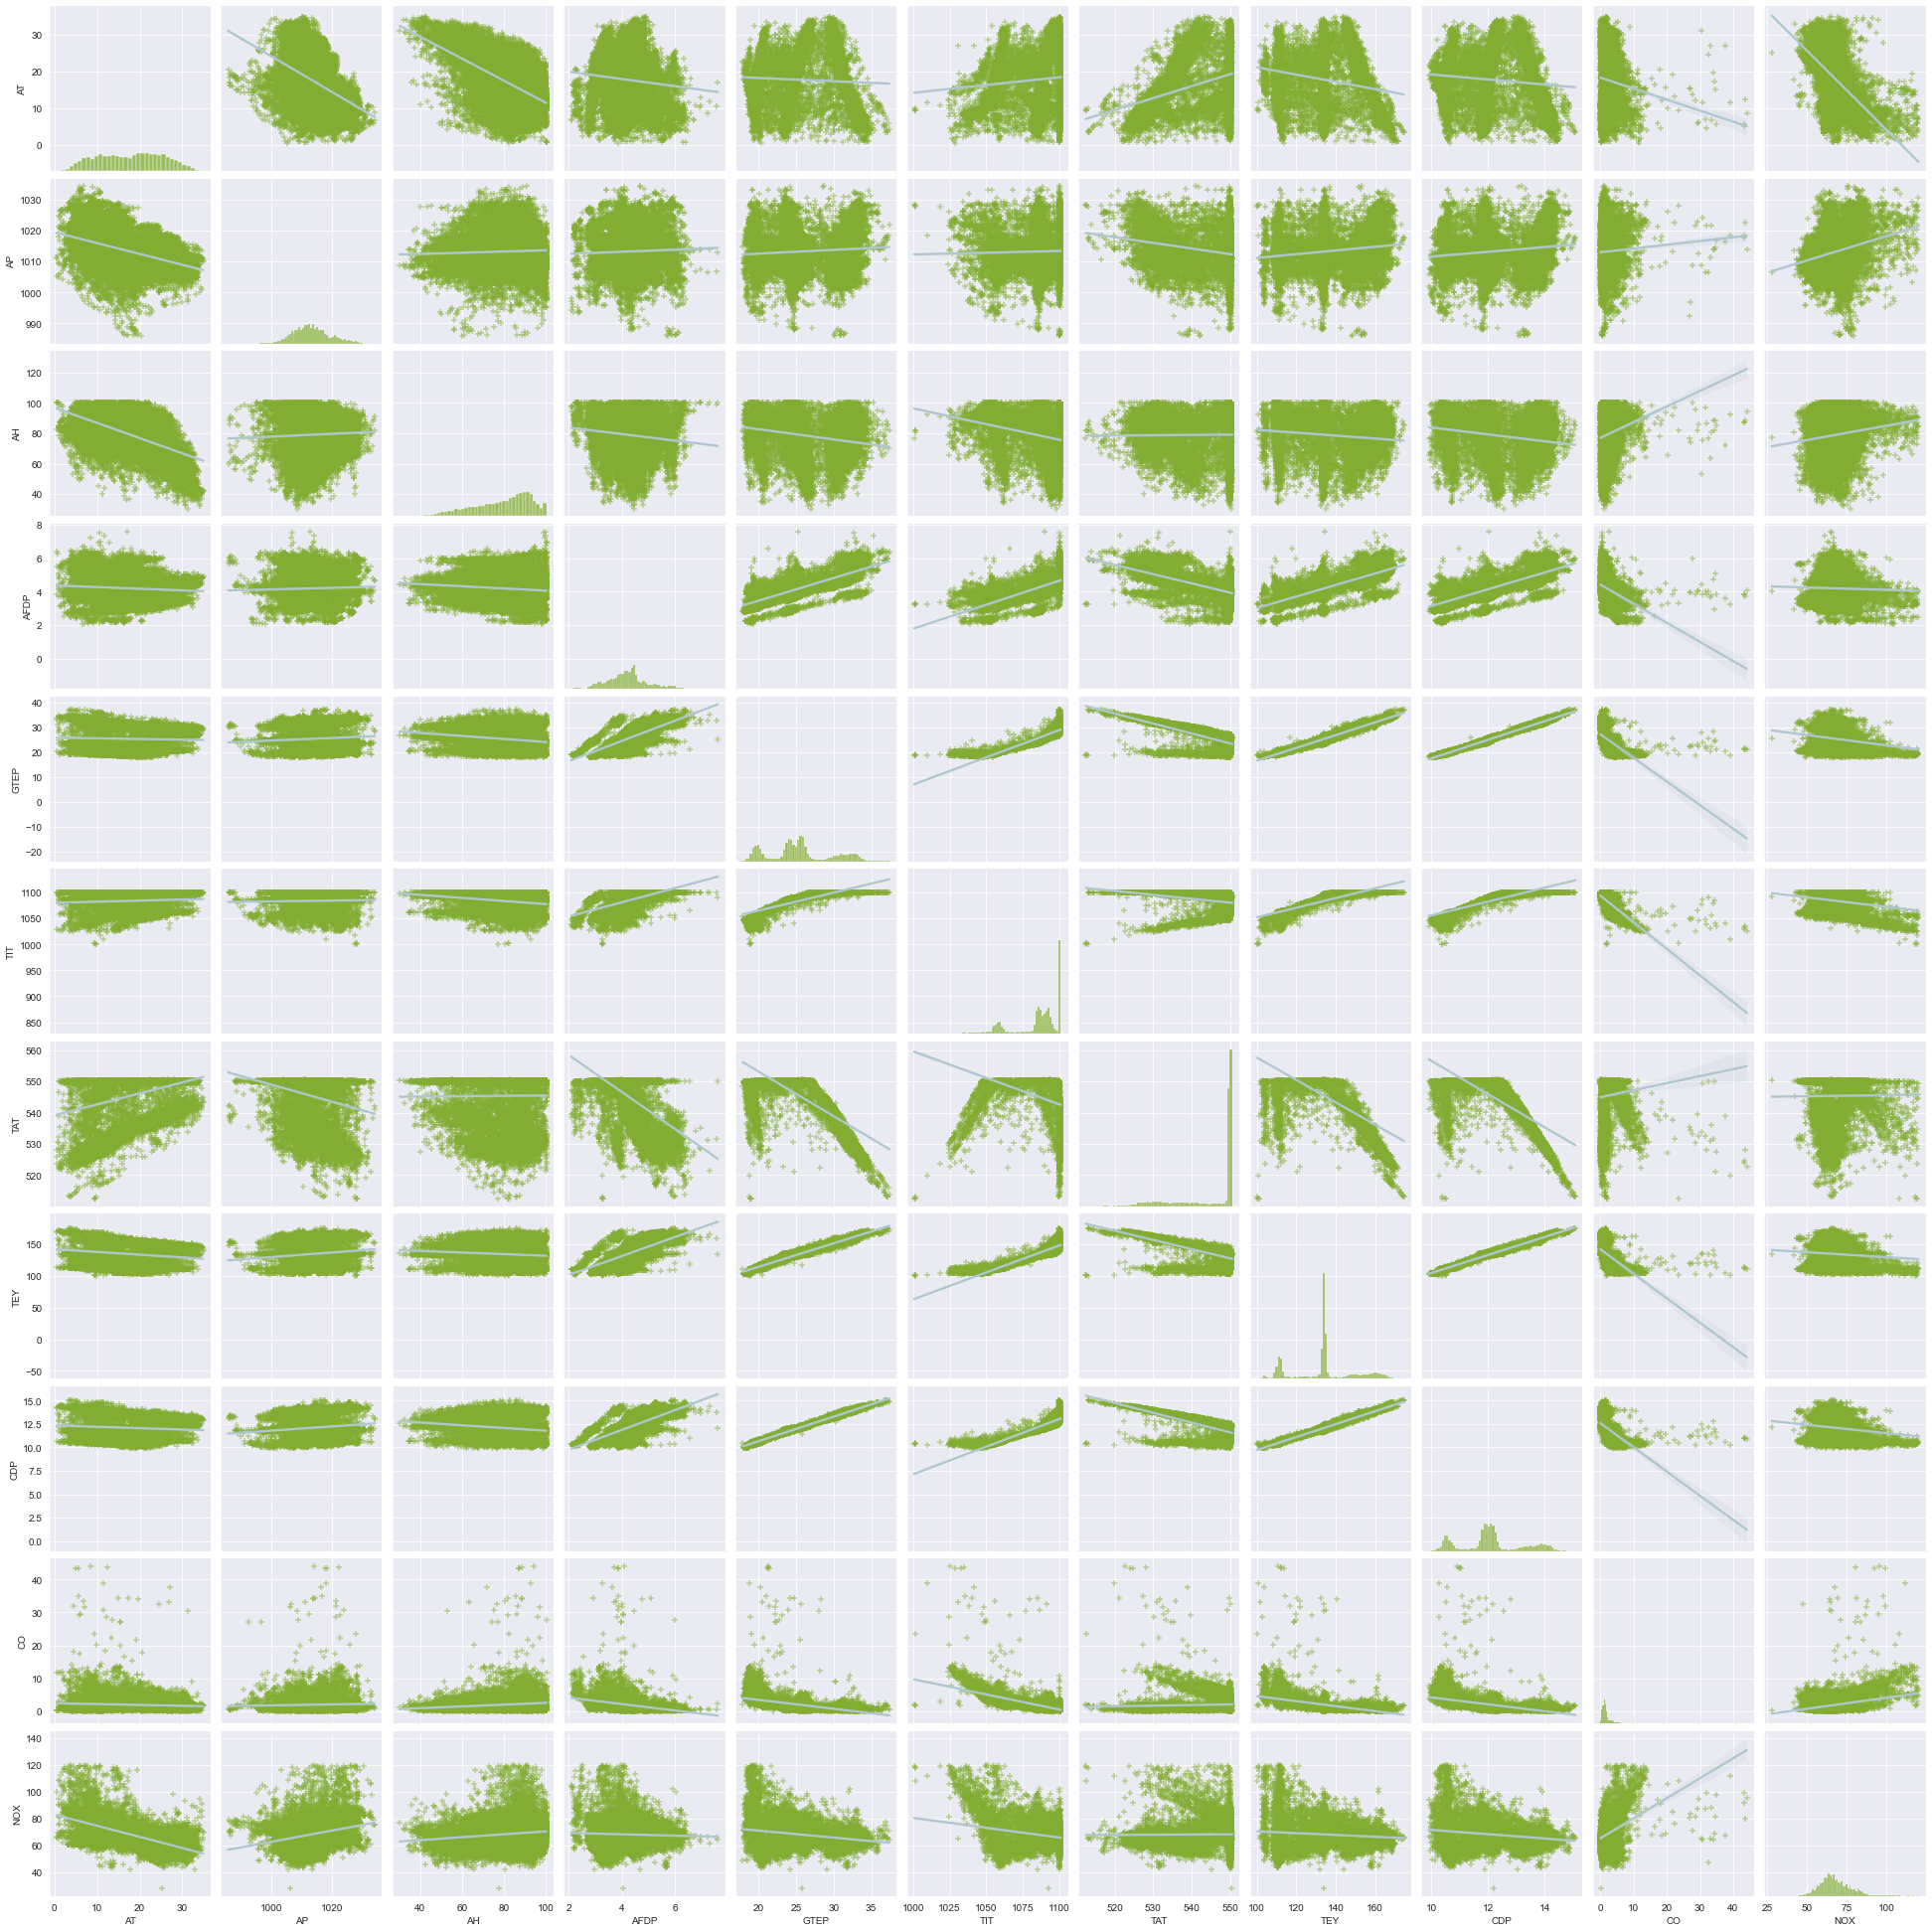

In [35]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

<Figure size 1440x1440 with 0 Axes>

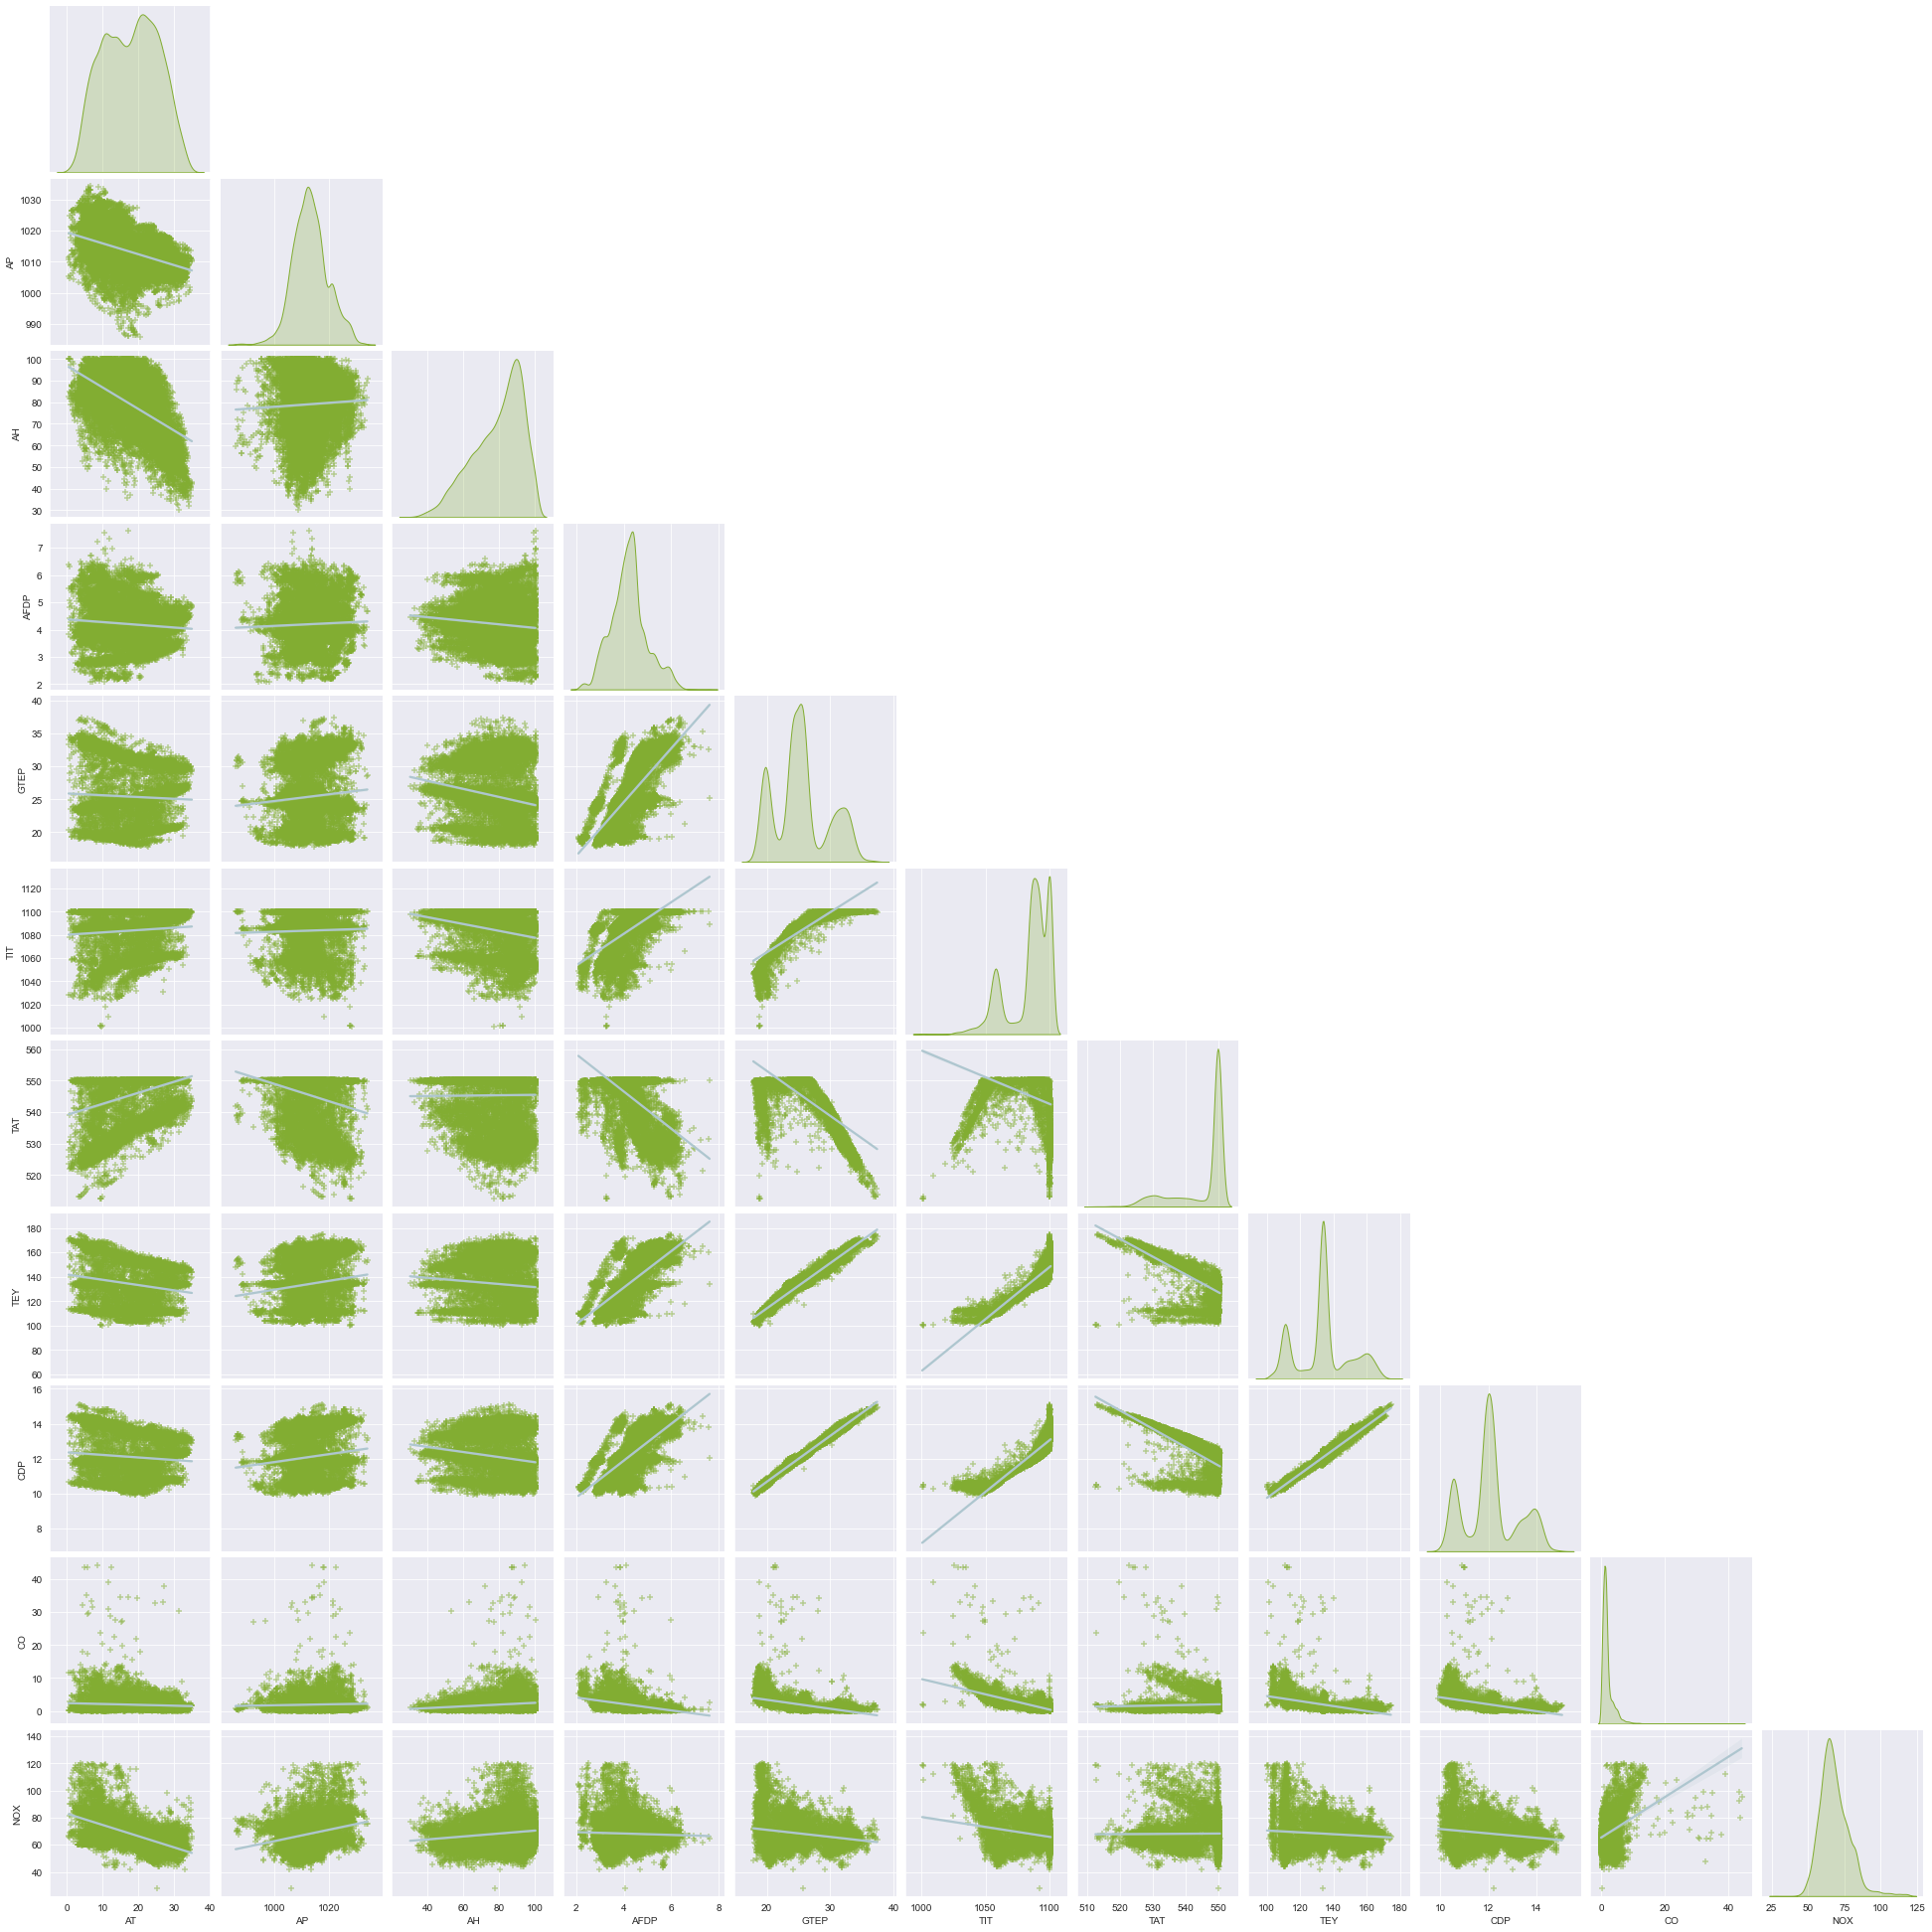

In [36]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

##### Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

* A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

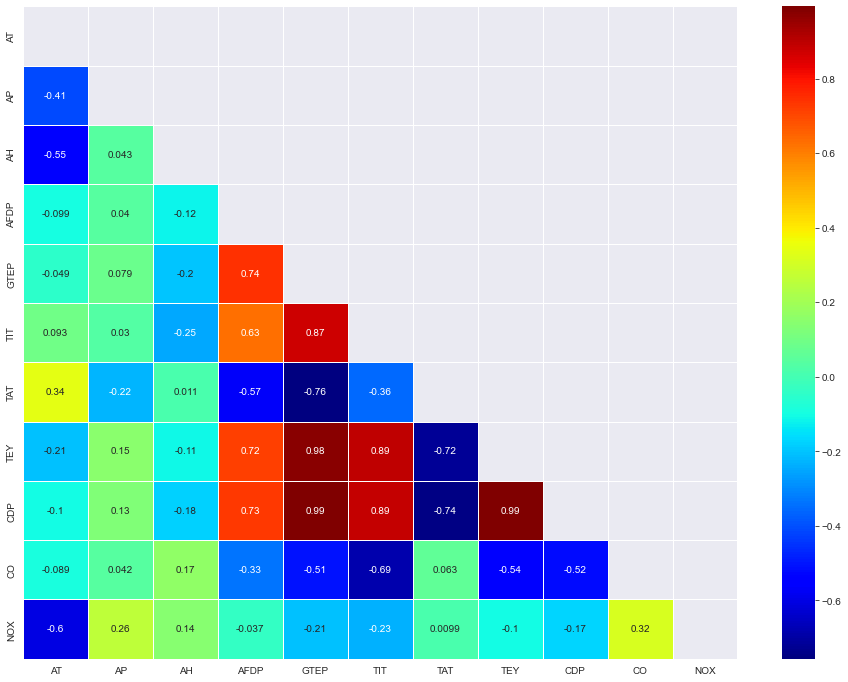

In [37]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

###  Feature Selection Technique

In [38]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

In [39]:
#Feature importance
from numpy import set_printoptions

In [40]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [41]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [42]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712818,CDP
4,1.600703,GTEP
5,1.324857,TIT
6,0.897405,TAT
3,0.661120,AFDP
8,0.512894,CO
0,0.412416,AT
9,0.300278,NOX
1,0.137417,AP
2,0.097349,AH


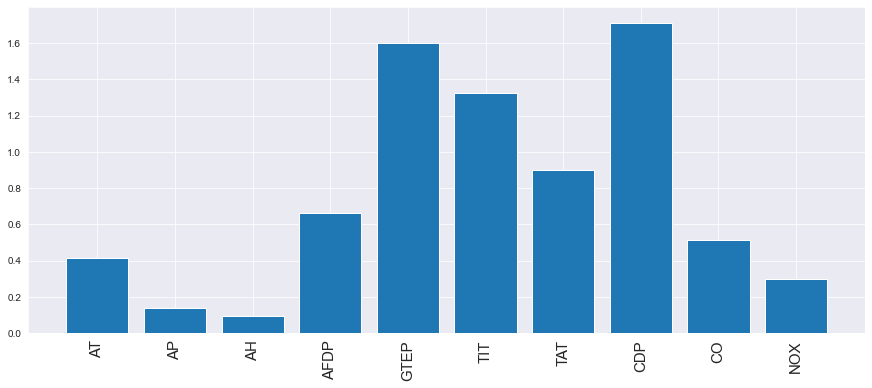

In [43]:
fig, axes = plt.subplots(figsize=(15, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

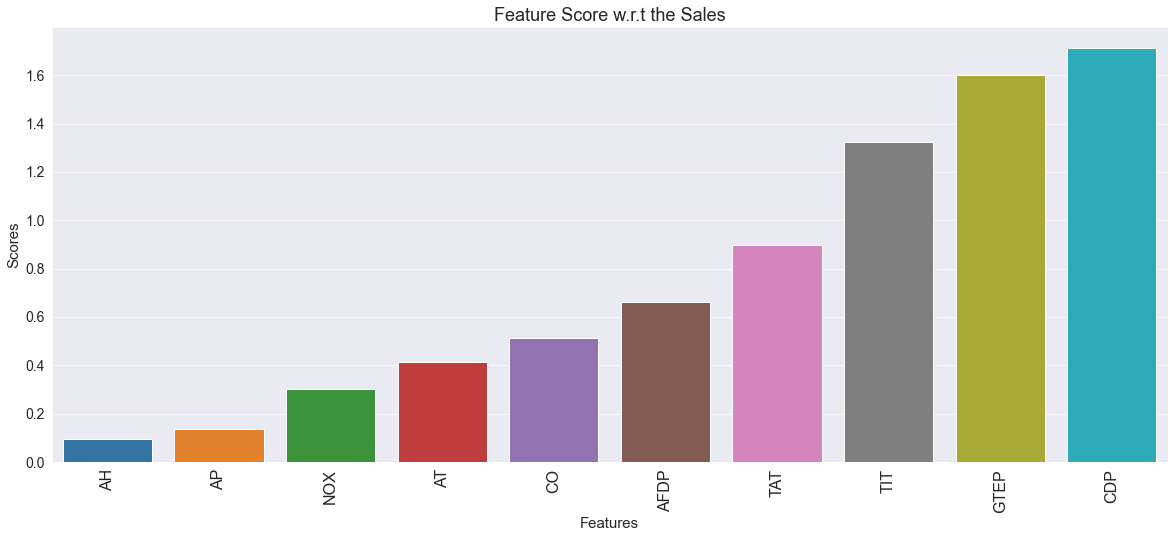

In [44]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [45]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.712818,CDP
4,1.600703,GTEP
5,1.324857,TIT
6,0.897405,TAT
3,0.661120,AFDP
8,0.512894,CO
0,0.412416,AT
9,0.300278,NOX
1,0.137417,AP
2,0.097349,AH


In [46]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
#### Applying Standard Scaler

In [47]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [48]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


### Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [50]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


## Test Train Split 

In [51]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [52]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

## Hyperparameter Tuning

### Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [53]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [67]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turb')

In [68]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [69]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
13                |?                 |num_layers
96                |?                 |units_0
64                |?                 |units_1
0.01              |?                 |learning_rate

Epoch 1/100
329/329 [==============================] - 3s 5ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - val_loss: 0.1460 - val_mean_absolute_error: 0.1460
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - val_loss: 0.1001 - val_mean_absolute_error: 0.1001
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - val_loss: 0.0568 - val_mean_absolute_error: 0.0568
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - val_loss: 0.0540 - val_mean_absolute_error: 0.0540
Epoch 5/100
329/329 [==============================] - 1s 4ms/step

KeyboardInterrupt: 

In [70]:
tuner.results_summary()

Results summary
Results in project\Gas Turb
Showing 10 best trials


## Model Building Neural Networks
### Standardizing only predictor variable - after train test split

In [71]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [72]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [73]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 17666.9492 - mae: 131.9547 - mse: 17666.9492 - val_loss: 16831.5547 - val_mae: 128.7768 - val_mse: 16831.5527
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 16333.2168 - mae: 126.8104 - mse: 16333.2168 - val_loss: 15775.2559 - val_mae: 124.6084 - val_mse: 15775.2559
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15355.9590 - mae: 122.8960 - mse: 15355.9590 - val_loss: 14855.7773 - val_mae: 120.8627 - val_mse: 14855.7773
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 14470.0498 - mae: 119.2371 - mse: 14470.0498 - val_loss: 14001.8730 - val_mae: 117.2770 - val_mse: 14001.8730
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 13640.3623 - mae: 115.7026 - mse: 13640.3623 - val_loss: 13196.8369 - val_mae: 113.7931 - val_mse: 13196.8369
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 

In [74]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.864758
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.499312
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.60968
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.645838
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.094198
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.659759
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.637526
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.668926
dtype: float64
94/94 [==============

,batchsize,epochs,Accuracy
0,5,5,TEY 97.864758 dtype: float64
0,5,10,TEY 99.499312 dtype: float64
0,5,50,TEY 99.60968 dtype: float64
0,5,100,TEY 99.645838 dtype: float64
0,10,5,TEY 81.094198 dtype: float64
0,10,10,TEY 98.659759 dtype: float64
0,10,50,TEY 99.637526 dtype: float64
0,10,100,TEY 99.668926 dtype: float64
0,15,5,TEY 58.702458 dtype: float64
0,15,10,TEY 89.868836 dtype: float64


In [94]:
# getting corresponding row values of the maximum value of 'Accuracy' column
#finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
#finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

### Training Model - using best params

In [77]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

#### Model Evaluation Train and Test Error

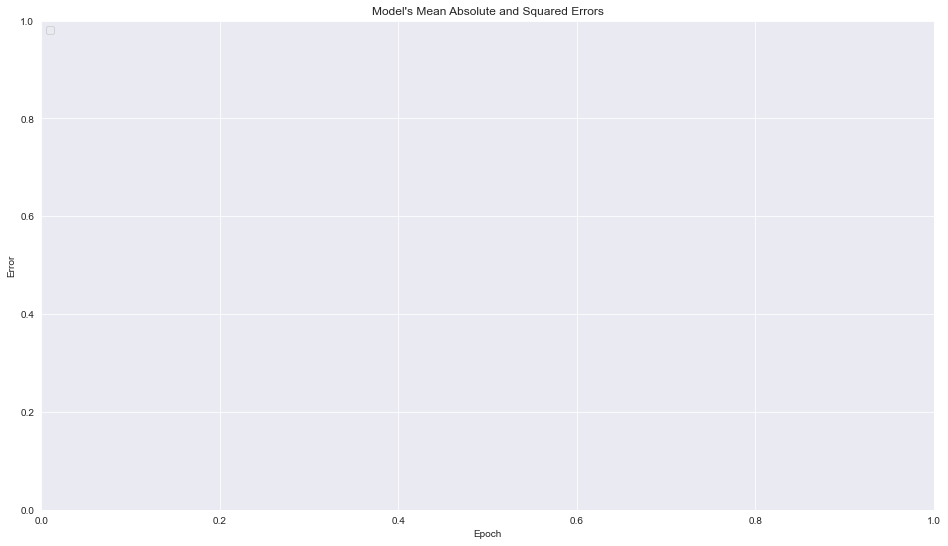

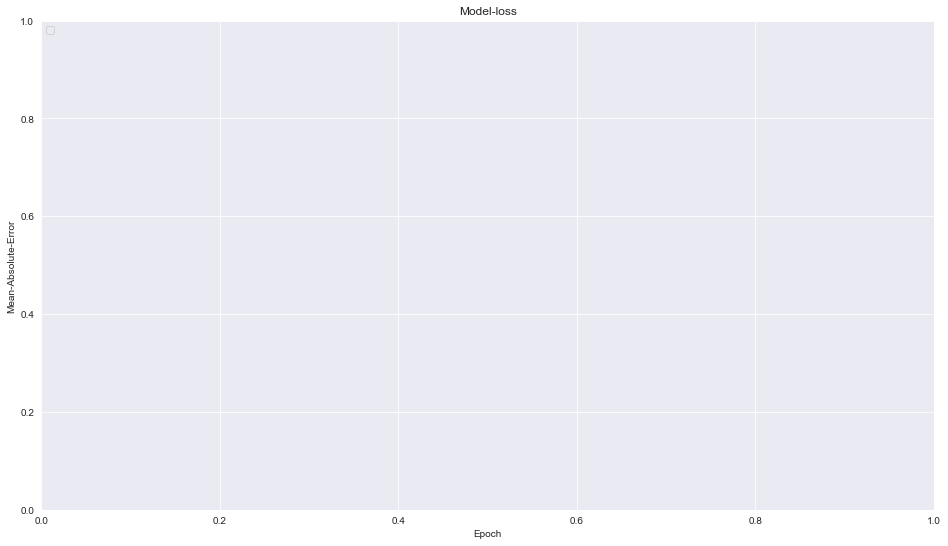

In [96]:
plt.figure(figsize=(16,9))
#plt.plot(model.history.history['mae'])
#plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
#plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

###  Predicting values from Model using same dataset

In [79]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.735931
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.865616
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.379501
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.155518
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.630142
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.031097
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.747040
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.632843
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,161.075745
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,162.638474


In [80]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

###  Calculating Absolute Percent Error and Error

In [81]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.53716720724194


,Actual,Predicted,APE %
13312,134.46,134.735931,0.205214
12627,111.88,112.865616,0.880958
6393,133.72,134.379501,0.493196
4990,133.79,134.155518,0.273202
12462,110.77,111.630142,0.776512


In [82]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.735931,0.205214,-0.002052
1,111.88,112.865616,0.880958,-0.008810
2,133.72,134.379501,0.493196,-0.004932
3,133.79,134.155518,0.273202,-0.002732
4,110.77,111.630142,0.776512,-0.007765
...,...,...,...,...
3003,119.25,120.278587,0.862547,-0.008625
3004,133.74,134.163940,0.316989,-0.003170
3005,146.31,147.129578,0.560165,-0.005602
3006,150.07,150.205185,0.090081,-0.000901


### Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

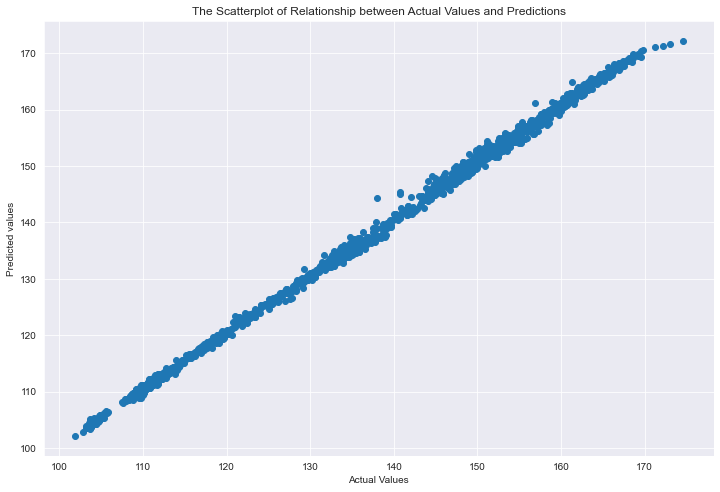

In [83]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [84]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.6232333746362243
MSE: 0.6278990158318789
RMSE: 0.792400792422546


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9983653081392703
R2_score (test):  0.997492312095267


In [86]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.87 of the target correctly


### Residual Analysis
#### Test for Normality of Residuals (Q-Q Plot)

<AxesSubplot:ylabel='Density'>

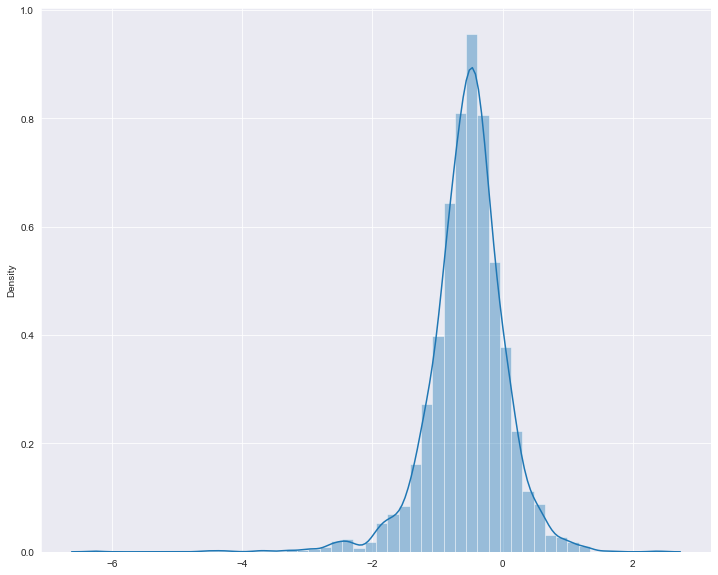

In [87]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

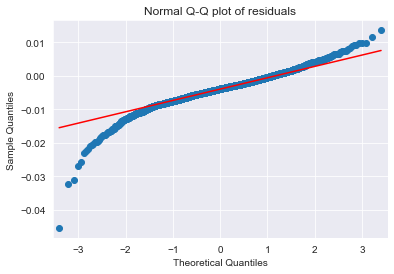

In [88]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()